# 19.2.2 Build a Basic Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

## Data preparation

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

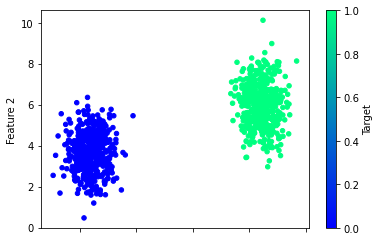

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a Dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

### Split train and test

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

### Scale the data

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Neural Network Model

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential Model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 19.2.3 Train and Test a Basic Neural Network

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.9467
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.9680
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.9707
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.9720
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.9733
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.9733
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.9733
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.9760
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.9773
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.9787
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

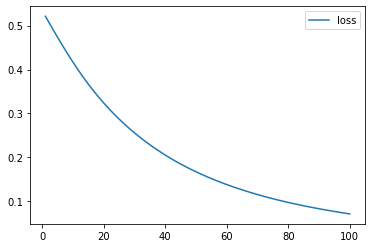

In [13]:
# Create a Dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

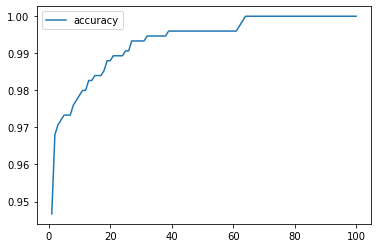

In [14]:
# plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0684 - accuracy: 1.0000 - 178ms/epoch - 22ms/step
Loss: 0.06835943460464478, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y= make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# 19.2.4 Nuances of Neural Networks on Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

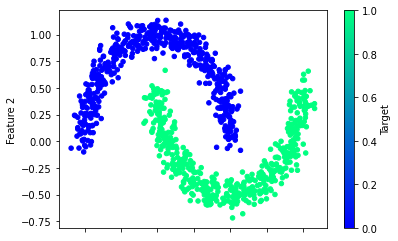

In [18]:
from sklearn.datasets import make_moons

# Create dummy nolinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

## Processing the data

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

## Train and evaluate the model

In [20]:
# Train the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2036 - accuracy: 0.4440
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9754 - accuracy: 0.4867
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.5013
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8663 - accuracy: 0.5200
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8288 - accuracy: 0.5293
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.5387
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7713 - accuracy: 0.5547
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.5680
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.5800
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8773
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8773
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.8787
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8800
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.8800
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8800
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.8813
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8813
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8813
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8840
Epoch 93/100


<AxesSubplot:>

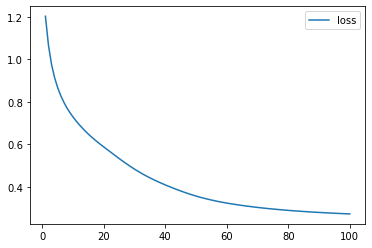

In [21]:
# Create a Dataframe containing training history
moon_history_df = pd.DataFrame(model_moon.history, index= range(1, len(model_moon.history["loss"])+1))

# Plot the loss
moon_history_df.plot(y="loss")

<AxesSubplot:>

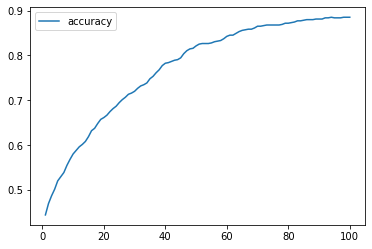

In [22]:
# Plot the accuracy
moon_history_df.plot(y="accuracy")